In [1]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../")
import setigen as stg

/Users/bbrzycki/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tsamp = 18.253611008
fch1 = 6095.214842353016
df = -2.7939677238464355e-06

fchans = 1024
tchans = 16

fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

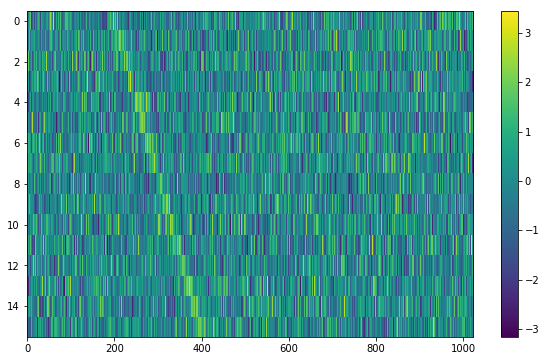

In [26]:
signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[200], drift_rate = -0.000002),
                          stg.constant_t_profile(level = 2),
                          stg.gaussian_f_profile(width = 0.00002),
                          stg.constant_bp_profile(level = 1.0))

fig = plt.figure(figsize=(10,6))
# plt.imshow(signal, aspect='auto')

plt.imshow(stg.normalize(stg.inject_noise(signal)), aspect='auto')
plt.colorbar()

362 -5.366627228013598e-06 2


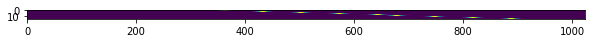

In [76]:
start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                               (fchans-1-start_index)*df/(tsamp*tchans))
level = np.random.randint(1,5)

signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.constant_t_profile(level = level),
                          stg.gaussian_f_profile(width = 0.00002),
                          stg.constant_bp_profile(level = 1.0))

fig = plt.figure(figsize=(10,6))
# plt.imshow(signal, aspect='auto')

# # plt.imshow(stg.normalize(stg.inject_noise(signal)), aspect='auto')
# plt.colorbar()
plt.imshow(signal)
fig.savefig('test.png')
print(start_index, drift_rate, level)

In [30]:
np.random.uniform(1,0)

0.6641330074949295